In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel("D:\\Download\\customer_churn_large_dataset.xlsx")

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,100000.0,50000.500000,28867.657797,1.0,25000.75,50000.50,75000.25,100000.0
Age,100000.0,44.027020,15.280283,18.0,31.00,44.00,57.00,70.0
Subscription_Length_Months,100000.0,12.490100,6.926461,1.0,6.00,12.00,19.00,24.0
Monthly_Bill,100000.0,65.053197,20.230696,30.0,47.54,65.01,82.64,100.0
Total_Usage_GB,100000.0,274.393650,130.463063,50.0,161.00,274.00,387.00,500.0
Churn,100000.0,0.497790,0.499998,0.0,0.00,0.00,1.00,1.0


In [7]:
df.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [8]:
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [9]:
df=df.drop(['CustomerID','Name'],axis=True)

In [10]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [11]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [13]:
df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [14]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Location']= label_encoder.fit_transform(df['Location'])

In [16]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  int32  
 2   Location                    100000 non-null  int32  
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int32(2), int64(4)
memory usage: 4.6 MB


In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(100000, 7)

<Axes: >

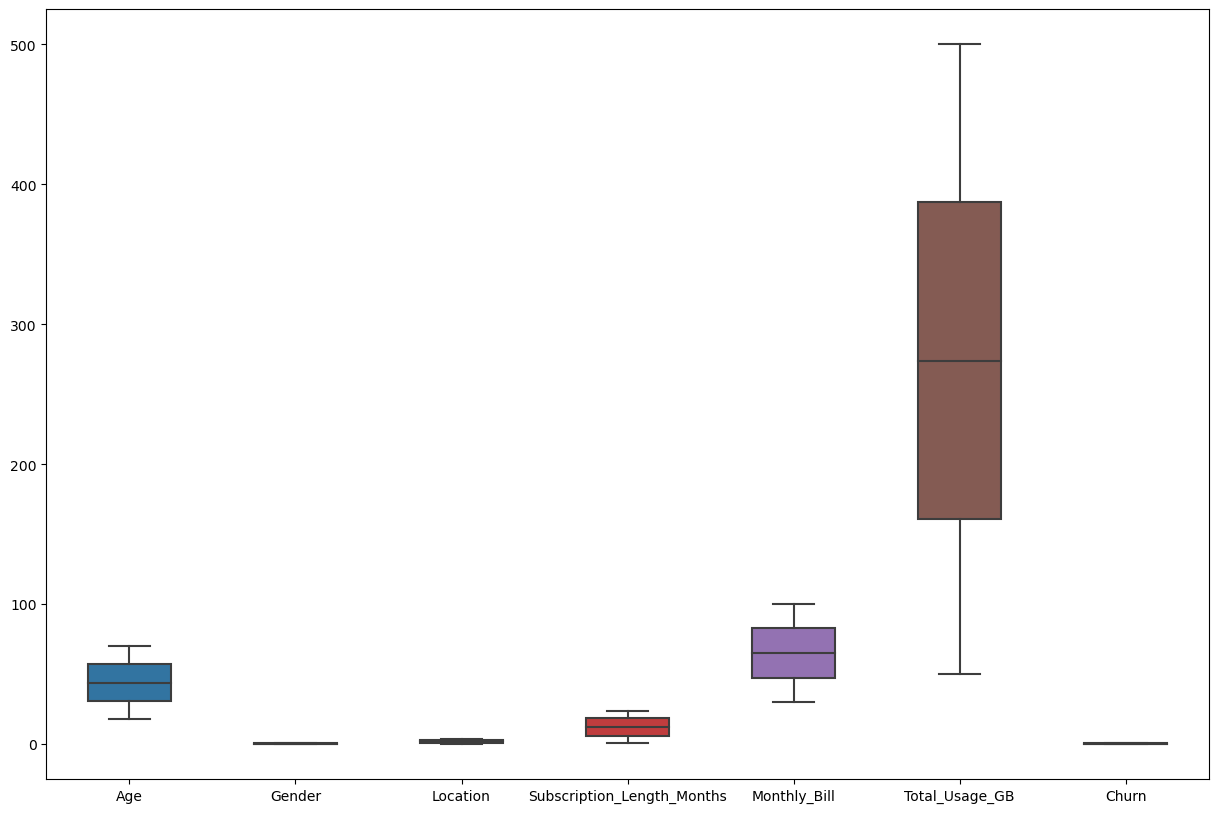

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [21]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [23]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [24]:
X_scaled

array([[ 1.24167039,  1.00432937,  0.00294695,  0.65111499,  0.41060598,
        -0.29428898],
       [ 1.17622625, -0.99568929,  1.41974758, -1.65887854, -0.80537409,
        -0.78485174],
       [-1.31065114, -0.99568929,  0.00294695, -1.08138015,  1.0092043 ,
         1.42268068],
       ...,
       [ 1.30711454,  1.00432937, -1.41385369,  0.65111499,  1.5351404 ,
        -0.17931334],
       [ 0.45634069, -0.99568929,  1.41974758,  1.08423877, -0.78115335,
         1.22338955],
       [-1.11431871, -0.99568929,  0.00294695,  0.93986418,  0.56927655,
        -0.7771867 ]])

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [26]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
print(log_reg.score(x_train,y_train))
y_pred = log_reg.predict(x_test)

In [28]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.50052

In [29]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [30]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
model.score(x_train,y_train)

1.0

In [32]:
y_predict=model.predict(x_test)

In [33]:
accuracy_score(y_test,y_predict)

0.50404

In [34]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [35]:
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)

In [36]:
grid_searh.fit(x_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [37]:
grid_searh.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'random'}

In [38]:
model_with_best_params=DecisionTreeClassifier(criterion= 'gini',max_depth= 3,min_samples_leaf= 7,min_samples_split= 2,splitter='random')

In [39]:
model_with_best_params.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, splitter='random')

In [40]:
y_prediction2=model_with_best_params.predict(x_test)

In [41]:
accuracy_score(y_test,y_prediction2)

0.5056

In [52]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier(n_estimators=100, random_state=42)

In [53]:
Rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred_rf=Rf_model.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred_rf)

0.50124